## 14 Problema de las n reinas

El problema de las n reinas conciste en colocar reinas de ajedrez en un tablero de $n\times n$ sin que se ataquen entre sí. Tratamos de buscar todas las soluciones posibles al problema.

### 14.1 Algoritmo

In [3]:
def esValida (fila, columna, reinas):
    for i in range (fila):
        #verificar que no sea la misma columna
        if columna == reinas [i]:
            return False
        #verificar que no sea la misma diagonal
        elif abs(columna - reinas[i]) == abs(fila - i):
            return False
    return True

def colocarReinas (fila, reinas, n):
    if fila == n:
        # print(reinas)
        return 1
    else:
        soluciones = 0
        for columna in range (n):
            if esValida(fila, columna, reinas):
                reinas[fila] = columna
                soluciones += colocarReinas(fila+1, reinas, n)
        return soluciones

def nReinas (n):
    reinas = ['']*n
    fila = 0
    return colocarReinas(fila, reinas, n)

nReinas(7)

40

### 14.2 Verificación

**Invariante:** Al colocar la i-ésima reina, las primeras $i-1$ reinas están colocadas de tal forma que no se atacan entre sí.  
**Inicilización:** Al colocar la primera reina no hay forma de atacar a tra reina.  
**Mantenimiento:** En la iésima fila, se coloca una reina de tal forma que no ataca a ninguna de las reinas ya puestas.  
**Finalización:** Se cuenta una solución cuando se coloca una reina en la última fila.  

### 14.3 Análisis del tiempo de ejecución

En la función esValida vemos que las líneas 2 a 5 tienen tiempo de ejecución $\theta(1)$, pero al estar dentro del ciclo for, se ejecutan a lo más n veces por lo que el tiempo de ejecución de la función esValida es $O(n)$.  
En la función colocarReinas analizamos línea por línea: Las líneas 1 a 4 tienen tiempo de ejecución $\theta(1)$. La línea 5 es $\theta(n)$ al ser un for que va de 0 a n. La línea 6 tiene tiempo de ejecución $O(n)$, como ya lo calculamos en le párrafo anterior. La línea 7 tendrá tiempo de ejecución $\theta(1)$. La línea 8 que es la recursión tiene tiempo de ejecución $T(n-1)$ ya que es la musma función pero con una fila menos.  
Ahora sumando, tenemos que $T(n)=\theta(1) + n[O(n) + \theta(1) + T(n-1)]$  
Simplificando  
$T(n) = nT(n-1) + O(n^2) + \theta(n) +\theta(1)$  
$T(n) = nT(n-1) +O(n^2)$  
Resolviendo la recursión por sustitución  
$T(n-1) = (n-1)T(n-2) + O(n^2)$  
$T(n-2) = (n-2)T(n-3) + O(n^2)$  
  
$T(n) = n[(n-1)[(n-2)T(n-3)+ O(n^2)]+ O(n^2)]+ O(n^2)$  
$T(n) = n[(n-1)(n-2)T(n-3)+(n-1)O(n^2) + O(n^2)]+ O(n^2)$  
$T(n) = n(n-1)(n-2)T(n-3)+n(n-1)O(n^2) + nO(n^2)+ O(n^2)$  
$T(n) = n(n-1)(n-2)T(n-3)+O(n^2)[n(n-1) + n + 1]$  
  
$T(n-3) = (n-3)T(n-4) + O(n^2)$  
  
$T(n) = n(n-1)(n-2)[(n-3)T(n-4) + O(n^2)]+O(n^2)[n(n-1) + n + 1]$    
$T(n) = n(n-1)(n-2)(n-3)T(n-4) + O(n^2)[n(n-1)(n-2) + n(n-1) + n + 1]$    
...  
$T(n) = n(n-1)(n-2)...(n-k+1)T(n-k)+O(n^2)[n(n-1)(n-2)...(n-k+2)+  ... + n(n-1) + n + 1]$  
Caso base: $k=n, T(0) = \theta(1)$  
$T(n) = n!*T(0)+O(n^2)\sum (n!/i!)$   
$T(n) = n!+O(n^2)+O(n^2*n!)\sum (1/i!)$   
Como $\sum (1/i!)$ cuando n tiende a infinito converge a $(e-1)$, trataremos el término como una constante  
Finalmente  
$T(n) = O(n^2*n!)$




### 14.4 Experimentación en el tiempo de ejecución

0 x 0: 3.7999998312443495e-06
1 x 1: 5.800000508315861e-06
2 x 2: 6.300004315562546e-06
3 x 3: 1.069999416358769e-05
4 x 4: 3.640000068116933e-05
5 x 5: 0.00012469998910091817
6 x 6: 0.00047559999802615494
7 x 7: 0.002094399998895824
8 x 8: 0.009092799999052659
9 x 9: 0.047314199997344986
10 x 10: 0.22908199999073986
11 x 11: 1.2730811999936122
12 x 12: 7.427054100000532
13 x 13: 47.14355349999096
14 x 14: 314.08031689999916


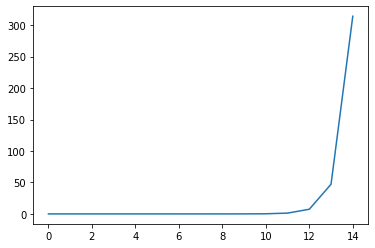

In [4]:
from timeit import default_timer
import matplotlib.pyplot as plt


y=[]
x=[]
for i in range (15):
    inicio = default_timer()
    A = nReinas(i)
    fin = default_timer()
    print(str(i) + ' x ' + str(i) + ': ' + str(fin-inicio))
    x.append(i)
    y.append(fin-inicio)

plt.plot(x, y)